In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
np.random.seed(11)

In [2]:
DFgen = pd.read_csv('genome_scores.csv')
DFgen

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
11709763,131170,1124,0.58775
11709764,131170,1125,0.01075
11709765,131170,1126,0.01575
11709766,131170,1127,0.11450


Create a pivot table to have each row have all the movie tag information:

In [3]:
DFgen = DFgen.pivot_table('relevance', 'movieId', 'tagId')
DFgen

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
2,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
3,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
4,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
5,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130578,0.15400,0.04025,0.01975,0.01850,0.02850,0.02275,0.01000,0.03675,0.01025,0.01575,...,0.02875,0.01125,0.01250,0.02050,0.21000,0.02375,0.04225,0.00525,0.07575,0.01325
130840,0.02400,0.03025,0.02425,0.09375,0.05600,0.06025,0.02100,0.12900,0.11275,0.03650,...,0.02125,0.04250,0.01025,0.20350,0.47675,0.10775,0.06200,0.00775,0.27000,0.13375
131013,0.04200,0.03175,0.01700,0.05600,0.05750,0.02675,0.01600,0.04200,0.02800,0.03725,...,0.06675,0.01300,0.01275,0.02275,0.20000,0.10750,0.02500,0.00950,0.07550,0.01625


In [4]:
DFrat = pd.read_csv('rating.csv')
DFrat

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


Get the last movie each user rated as our test set:

In [5]:
DFrat['timestamp'] = pd.to_datetime(DFrat['timestamp'])
DFrat['last'] = DFrat.groupby(['userId'])['timestamp'].rank(method='first', ascending=False)

In [6]:
test_ratings = DFrat[DFrat['last'] == 1]
DFrat = DFrat[DFrat['last'] > 1]

In [7]:
test_ratings

,userId,movieId,rating,timestamp,last
62,1,1750,3.5,2005-04-02 23:56:41,1.0
180,2,260,5.0,2000-11-21 15:36:54,1.0
241,3,173,2.0,1999-12-14 12:54:59,1.0
445,4,548,3.0,1996-08-24 09:40:54,1.0
511,5,1136,5.0,1996-12-26 16:28:48,1.0
...,...,...,...,...,...
19999628,138489,2858,4.0,2012-11-15 14:36:19,1.0
19999655,138490,261,3.0,2000-11-30 00:52:56,1.0
19999805,138491,8961,2.5,2009-07-09 23:49:07,1.0
19999848,138492,2791,5.0,2005-05-06 03:50:50,1.0


Get only the ratings that are going to be taken as positives >= 4:

In [8]:
DFrat = DFrat[DFrat['rating'] >= 4]
DFrat.shape

(9915496, 5)

Change the dataframe to have all the movies each user rated as positive in a single column:

In [9]:
DFrat['movieId']=DFrat['movieId'].astype(str)
DFrat = DFrat.groupby('userId')['movieId'].apply(','.join)
DFrat = pd.DataFrame(DFrat)
DFrat

,movieId
userId,
1,"151,223,253,260,293,296,318,541,1036,1079,1090..."
2,"3,62,70,110,266,480,541,589,908,924,1196,1210,..."
3,"1,32,50,175,223,260,316,318,329,457,480,490,54..."
4,"10,350,356,368,370,377,431,454,480,489,520,586..."
5,"11,62,110,141,150,260,282,316,318,350,364,368,..."
...,...
138489,"29,50,318,593,745,858,912,1061,1148,1193,1203,..."
138490,"17,32,34,85,110,111,123,150,199,232,235,247,26..."
138491,"1093,2857,3186,4128,6874"


Get the number of positive rated movies by each user:

In [10]:
DFrat['rated'] = DFrat.apply(lambda row: len(str(row['movieId']).split(',')), axis=1)
DFrat

,movieId,rated
userId,,
1,"151,223,253,260,293,296,318,541,1036,1079,1090...",88
2,"3,62,70,110,266,480,541,589,908,924,1196,1210,...",42
3,"1,32,50,175,223,260,316,318,329,457,480,490,54...",145
4,"10,350,356,368,370,377,431,454,480,489,520,586...",16
5,"11,62,110,141,150,260,282,316,318,350,364,368,...",49
...,...,...
138489,"29,50,318,593,745,858,912,1061,1148,1193,1203,...",26
138490,"17,32,34,85,110,111,123,150,199,232,235,247,26...",86
138491,"1093,2857,3186,4128,6874",5


Make a histogram for the amount of movies rated:

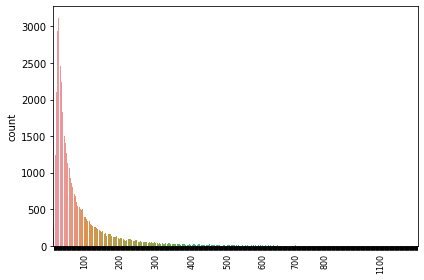

In [11]:
hist_rat = np.array(DFrat.iloc[:, 1].values)
ax = sns.countplot(x=hist_rat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)
for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 100 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.tight_layout()
plt.show()

remove people with too many likes to reduce computation:

In [12]:
# remove people with too many likes
DFrat = DFrat[DFrat['rated'] <= 100]
DFrat.shape

(110144, 2)

The next step is to get gene or tag information for each user.

The way I accomplished this is by getting an averge of all the tags in every movie rated positive by each user.

This step takes around 30 mins so i saved the dataframe as a csv for continuous use.

In [13]:
means_list = []
for index, row in DFrat.iterrows():
    #get a list of the movies rated by each user
    movie_ids = [int(x) for x in row['movieId'].split(',')]
    mydf = pd.DataFrame()
    #make a dataframe with the genes of movies in that list
    for n in movie_ids:
        if n in DFgen.index:
            mydf[n] = DFgen.loc[n]
    #get a dictionary with the means
    means = mydf.mean(axis=1).to_dict()
    means_list.append(means)

dfmeans = pd.DataFrame(means_list) 
dfmeans.index = DFrat.index.to_list()
dfmeans.to_csv('user_genes.csv')

In [14]:
X = pd.read_csv("user_genes.csv")
X = X.set_index('Unnamed: 0')
X.index.names = ['userId']
X

,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
userId,,,,,,,,,,,,,,,,,,,,,
1,0.044687,0.035591,0.125099,0.100344,0.156580,0.112653,0.071818,0.205741,0.238884,0.088528,...,0.063634,0.034330,0.047901,0.070500,0.211349,0.106656,0.073153,0.035989,0.135645,0.038415
2,0.068423,0.081143,0.087601,0.097625,0.134702,0.190976,0.101857,0.224863,0.227565,0.069464,...,0.070179,0.066089,0.057619,0.051333,0.186363,0.069875,0.038631,0.060554,0.146815,0.030446
4,0.114062,0.104688,0.041578,0.063922,0.123813,0.132375,0.095000,0.213484,0.128062,0.037828,...,0.082781,0.024891,0.025391,0.041531,0.150531,0.061875,0.026469,0.024625,0.079297,0.019000
5,0.051439,0.042383,0.096811,0.083714,0.172071,0.144770,0.094128,0.242413,0.190296,0.066934,...,0.121617,0.034383,0.064153,0.056821,0.175510,0.087122,0.031077,0.044209,0.081179,0.020852
6,0.045904,0.051212,0.129635,0.078673,0.134865,0.132308,0.074288,0.170808,0.127481,0.108712,...,0.068615,0.029000,0.026808,0.044231,0.204750,0.088115,0.028962,0.021904,0.078981,0.018981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138487,0.033444,0.035272,0.093222,0.124517,0.146222,0.137389,0.094800,0.185267,0.136583,0.086867,...,0.088683,0.047056,0.031706,0.066939,0.249944,0.109411,0.036278,0.030817,0.076694,0.019417
138489,0.028913,0.027779,0.093442,0.167337,0.254010,0.257000,0.120019,0.264990,0.163683,0.106885,...,0.137183,0.069471,0.134798,0.071269,0.205346,0.147798,0.090163,0.129019,0.071135,0.022837
138490,0.027265,0.038567,0.153506,0.127985,0.169047,0.139250,0.076985,0.212320,0.122826,0.161727,...,0.114677,0.041247,0.068576,0.115538,0.299988,0.154785,0.048576,0.054358,0.077145,0.020041


Apply dimensionality reduction to the 1128 averaged tags assigned to each user:

In [15]:
#normalize data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
xpca = pca.fit_transform(X)
xpca.shape

(110144, 100)

Perform clustering to generate 10 classes of user according to their likes:

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=5)
xkm = kmeans.fit(xpca)
y = xkm.labels_

Assign a class to each user: 

In [18]:
DFrat['Group'] = y
DFrat = DFrat['Group'] 
DFrat

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


userId
1         0
2         6
4         1
5         3
6         1
         ..
138487    4
138489    7
138490    4
138491    8
138492    2
Name: Group, Length: 110144, dtype: int32

Get the ratings with the classes obtained for the qualifying users:

In [19]:
ratings = pd.read_csv('rating.csv')
ratings = ratings.drop(['timestamp'], axis = 1) 
ratings = ratings.merge(DFrat,how='inner',left_on=['userId'],right_on=['userId'])
ratings

,userId,movieId,rating,Group
0,1,2,3.5,0
1,1,29,3.5,0
2,1,32,3.5,0
3,1,47,3.5,0
4,1,50,3.5,0
...,...,...,...,...
7865164,138492,8376,4.5,2
7865165,138492,8623,3.5,2
7865166,138492,8784,5.0,2
7865167,138492,8807,4.0,2


In [20]:
ratings['rating'].unique()

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 1.5, 2.5, 0.5])

Assign a +1 to the positive class and a -1 to the negative to be able to reduce by adding:

In [21]:
ratings['rating'].values[ratings['rating'] < 4] = -1
ratings['rating'].values[ratings['rating'] >= 4] = 1
ratings

,userId,movieId,rating,Group
0,1,2,-1.0,0
1,1,29,-1.0,0
2,1,32,-1.0,0
3,1,47,-1.0,0
4,1,50,-1.0,0
...,...,...,...,...
7865164,138492,8376,1.0,2
7865165,138492,8623,-1.0,2
7865166,138492,8784,1.0,2
7865167,138492,8807,1.0,2


Separate the label and userid,movieid,group:

This will be used to predict if the user would like a movie based on what the rest of its group rated it.

In [22]:
ratings = ratings.to_numpy()
y = ratings[:,2]
x = ratings[:,[0,1,3]]

Label the test set with the created groups:

In [23]:
test_ratings = test_ratings.merge(DFrat,how='inner',left_on=['userId'],right_on=['userId'])
test_ratings

,userId,movieId,rating,timestamp,last,Group
0,1,1750,3.5,2005-04-02 23:56:41,1.0,0
1,2,260,5.0,2000-11-21 15:36:54,1.0,6
2,4,548,3.0,1996-08-24 09:40:54,1.0,1
3,5,1136,5.0,1996-12-26 16:28:48,1.0,3
4,6,140,4.0,1997-03-13 17:58:37,1.0,1
...,...,...,...,...,...,...
110139,138487,2701,3.0,2000-08-05 18:29:25,1.0,4
110140,138489,2858,4.0,2012-11-15 14:36:19,1.0,7
110141,138490,261,3.0,2000-11-30 00:52:56,1.0,4
110142,138491,8961,2.5,2009-07-09 23:49:07,1.0,8


In [24]:
test_ratings

,userId,movieId,rating,timestamp,last,Group
0,1,1750,3.5,2005-04-02 23:56:41,1.0,0
1,2,260,5.0,2000-11-21 15:36:54,1.0,6
2,4,548,3.0,1996-08-24 09:40:54,1.0,1
3,5,1136,5.0,1996-12-26 16:28:48,1.0,3
4,6,140,4.0,1997-03-13 17:58:37,1.0,1
...,...,...,...,...,...,...
110139,138487,2701,3.0,2000-08-05 18:29:25,1.0,4
110140,138489,2858,4.0,2012-11-15 14:36:19,1.0,7
110141,138490,261,3.0,2000-11-30 00:52:56,1.0,4
110142,138491,8961,2.5,2009-07-09 23:49:07,1.0,8


Change the test ratings to -1 and 1

In [25]:
test_ratings['rating'].values[test_ratings['rating'] < 4] = -1
test_ratings['rating'].values[test_ratings['rating'] >= 4] = 1

Separate the binary labels of the test set:

In [26]:
test_ratings = test_ratings.to_numpy()
y_test = test_ratings[:,2]
x_test = test_ratings[:,[0,1,5]]

For each user and movie being predicted add the ratings of the user's group:

In [27]:
from tqdm import tqdm
pred_rats = []
for i in tqdm(x_test):
    movie = i[1]
    group = i[2]
    pred_rats.append(y[(x[:, 2] == group) & (x[:, 1] == movie)].sum())

100%|██████████| 110144/110144 [29:39<00:00, 61.89it/s]


Switch the binary labels to 0 and 1

In [28]:
pred_rats = (np.asarray(pred_rats)>0).astype(int)

In [29]:
y_test = (y_test>0).astype(int)

Get the final binary classification accuracy:

In [30]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred_rats))

0.6693601104009297


Conclusions:

Trying to use the tag genes of each movie liked by the user in order to cluster them did not give impressive accuracy.

If it was my choice I would have done a recommendation system using Collaborative Filtering which gives the most likely movies that a user would like by comparing their previous watching history to other users.

Recommender systems are evaluated with protocols such as hit ratio@ n instead of accuracy which is calculated as a hit when the test movie is inside of a list of n recommendations.

If I were to improve binary classification I would need more ram in order to be able to use the tags given for each movie for the 20 million ratings. (Or separate the dataset)